In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read in the data

df = pd.read_csv(r'C:\Users\Mayta\Downloads\starbucks.csv')
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [7]:
# See if there is any null values

df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [9]:
# Fill null with 0s

df.fillna(0,inplace=True)

df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                0
dtype: int64

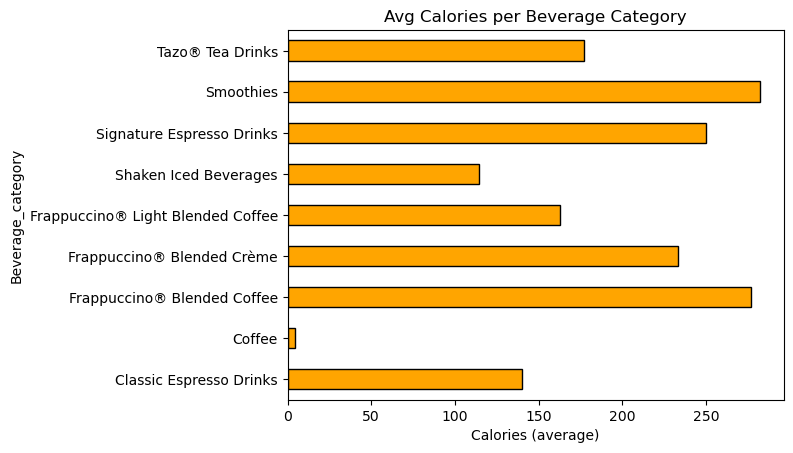

In [11]:
# Average calories per category

df.groupby(['Beverage_category'])['Calories'].mean().plot(kind='barh', color='Orange', edgecolor='Black')
plt.xlabel("Calories (average)")
plt.ylabel('Beverage_category')
plt.title("Avg Calories per Beverage Category")

plt.show()

In [ ]:
# Smoothies sound healthier, yet they are the most calorie-rich beverages among Starbucks drinks. 
# Let's dive into more data...

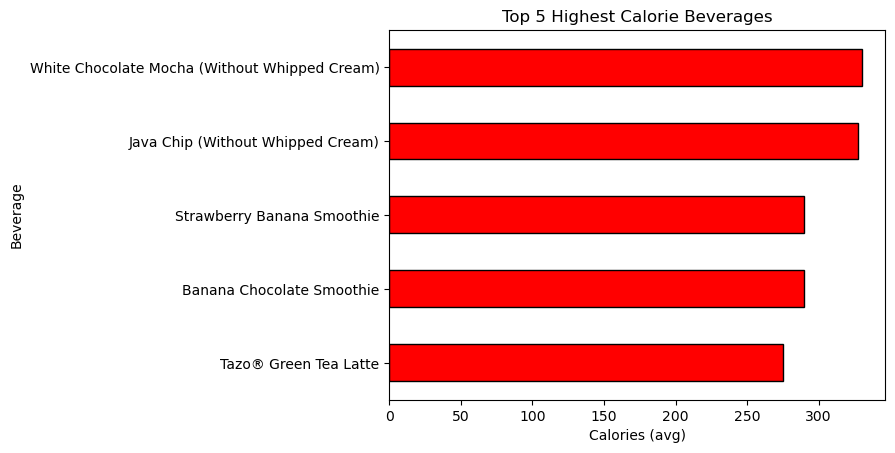

In [13]:
# Top 5 the most calorie rich beverage

# Calculate the average calories per beverage
avg_calories = df.groupby(['Beverage'])['Calories'].mean()

# Get the top 5 highest average calorie values
top5_high_cal_drinks = avg_calories.nlargest(5).sort_values(ascending=True)

# Plot the top 5 highest calorie beverages
top5_high_cal_drinks.plot(kind='barh',color='Red',edgecolor='Black')
plt.ylabel('Beverage')
plt.xlabel("Calories (avg)")
plt.title("Top 5 Highest Calorie Beverages")

plt.show()

In [ ]:
# 2 of 5 are smoothies! Bananas are high in calories.

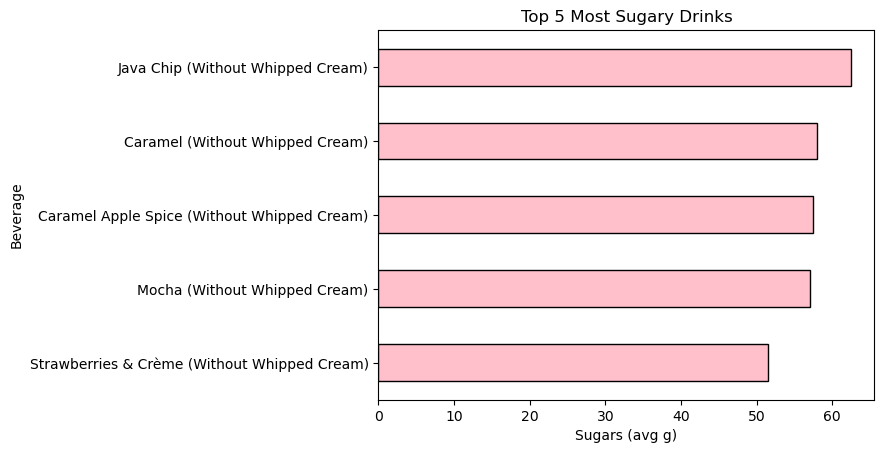

In [15]:
# Top 5 the most sugary drinks

# Rename a column
df.iloc[:,11]
df.rename(columns={df.columns[11]: 'Sugars'},inplace = True)

# Calculate the average calories per beverage
avg_sugar = df.groupby(['Beverage'])['Sugars'].mean()

# Get the top 5 most sugary drinks
top5_sugary_drinks = avg_sugar.nlargest(5).sort_values(ascending=True)

# Plot the top 5 most sugary drinks
top5_sugary_drinks.plot(kind='barh',color='Pink',edgecolor='Black')
plt.ylabel('Beverage')
plt.xlabel('Sugars (avg g)')
plt.title("Top 5 Most Sugary Drinks")

plt.show()

In [ ]:
# Sweet! Frappucchino drinks are all high in sugar.

In [17]:
# Let's see the caffiene content in each beverage category

# Look at the column and preprocess it for analysis frist

# Rename the column
df.rename(columns = {'Caffeine (mg)':'Caffeine'}, inplace=True)

# See the values
df['Caffeine'].values

array(['175', '260', '330', '410', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '85', '85', '85', '95',
       '95', '95', '175', '175', '175', '180', '180', '180', '75', '75',
       '75', '75', '75', '75', '150', '150', '150', '150', '150', '150',
       '75', '150', '225', '300', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '75', '150', '75', '75',
       '150', '150', '75', '75', '75', '75', '75', '75', '150', '150',
       '150', '150', '150', '150', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '10', '10', '10', '20',
       '20', '20', '25', '25', '25', '30', '30', '30', '0', '0', '0', '0',
       'Varies', 'Varies', 'Varies', 'Varies', '50', '50', '50', '70',
       '70', '70', '95', '95', '95', '120', '120', '120', '25', '25',
       '25', '55', '55', '55', '80', '80', '80', '110', '110', '110',
       'varies', 'varies', 'varies', 'varies', 'varies', 'varies'

In [19]:
# Get rid of object values to convert datatype into integer

values_to_drop = ['Varies','varies']
df2 = df[df['Caffeine'].isin(values_to_drop) == False]
df2['Caffeine'].values

array(['175', '260', '330', '410', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '85', '85', '85', '95',
       '95', '95', '175', '175', '175', '180', '180', '180', '75', '75',
       '75', '75', '75', '75', '150', '150', '150', '150', '150', '150',
       '75', '150', '225', '300', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '75', '150', '75', '75',
       '150', '150', '75', '75', '75', '75', '75', '75', '150', '150',
       '150', '150', '150', '150', '75', '75', '75', '75', '75', '75',
       '150', '150', '150', '150', '150', '150', '10', '10', '10', '20',
       '20', '20', '25', '25', '25', '30', '30', '30', '0', '0', '0', '0',
       '50', '50', '50', '70', '70', '70', '95', '95', '95', '120', '120',
       '120', '25', '25', '25', '55', '55', '55', '80', '80', '80', '110',
       '110', '110', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '120', '165', '235', '90', 0, '90', '9

In [21]:
# Change the data type from object to integer

df2['Caffeine'] = df2['Caffeine'].astype(int)
df2['Caffeine'].dtypes

C:\Users\Mayta\AppData\Local\Temp\ipykernel_5572\478721037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Caffeine'] = df2['Caffeine'].astype(int)


dtype('int32')

Text(0.5, 1.0, 'Average Caffeine Content in Each Category')

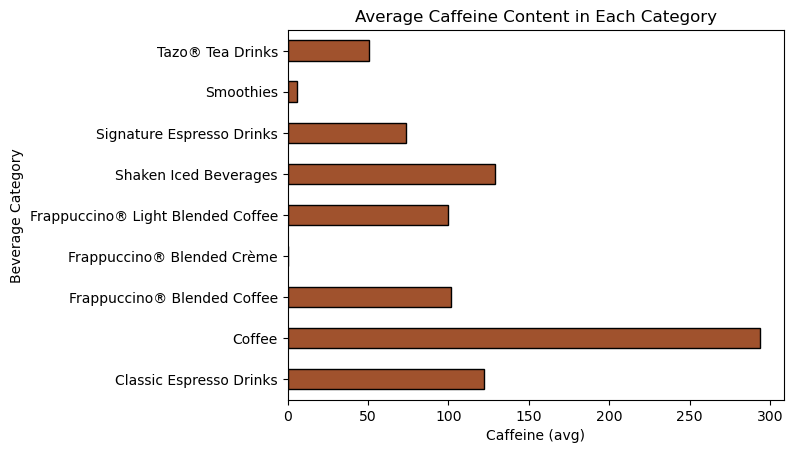

In [23]:
# Plot the avg caffeine content in each category

df2.groupby('Beverage_category')['Caffeine'].mean().plot(kind='barh',color='Sienna',edgecolor='Black')
plt.ylabel('Beverage Category')
plt.xlabel("Caffeine (avg)")
plt.title("Average Caffeine Content in Each Category")

In [25]:
# Let's see which drinks are healthier

healthy_drinks = df2[(df2['Caffeine'] < 400) & (df2['Sugars'] < 31.25)]
healthy_drinks.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars,Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75
5,Classic Espresso Drinks,Caffè Latte,2% Milk,100,3.5,2.0,0.1,15,85,10,0,9,6.0,10%,0%,20%,0%,75


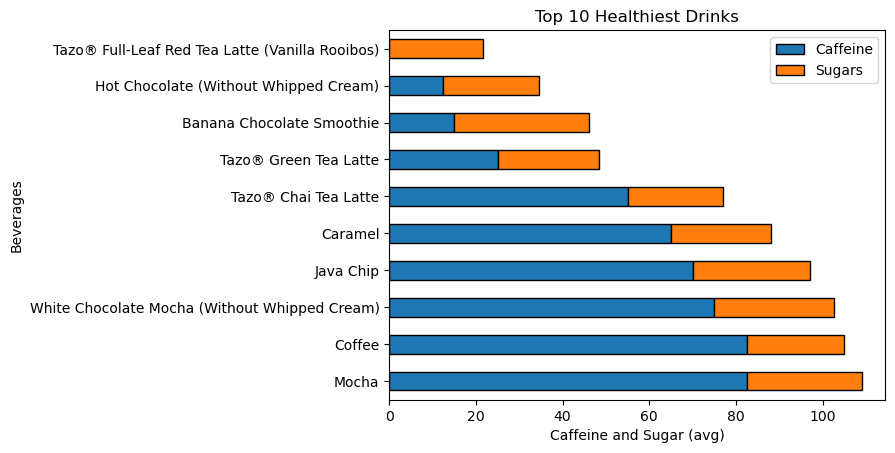

In [47]:
avg_healthy_drinks = healthy_drinks.groupby(['Beverage'])[["Caffeine","Sugars"]].mean()

top10_healthy_drinks = avg_healthy_drinks.nsmallest(10, columns=['Caffeine','Sugars']).sort_values(by=['Caffeine', 'Sugars'],ascending=False)

top10_healthy_drinks.plot(kind='barh',stacked=True,edgecolor='Black')
plt.ylabel('Beverages')
plt.xlabel("Caffeine and Sugar (avg)")
plt.title("Top 10 Healthiest Drinks")

plt.show()

In [ ]:
# Tazo Full_Leaf Red Tea Latte wins this competition. 
# The Banana Chocolate Smoothie is high in calories, but contains much less caffeine and sugar. 